**Author:** A.S. Grm (aleksander.grm@fpp.uni-lj.si)

**Date:** 2024

<hr>

# Rhumb Line Problem

In the analysis of a rhumb line voyage, we fundamentally distinguish **two** problems:
- determination of the distance $D_L$ and departure course $\omega_L$
- determination of the arrival position $P_1=(\varphi_1,\lambda_1)$

For both problems, let's examine the calculation of parameters. The calculations are performed using **Merkator's mean latitude** $\tilde{\varphi}$, which means the calculations are precise assuming the Earth is represented as a spherical shape. To determine positions on the *WGS84* ellipsoid, corrections for the Merkator latitude are necessary. However, these corrections are negligible, so we usually calculate using a sphere as an approximation of the Earth!

We enter positions in the format commonly used in navigation:

$\varphi = \#\#^\circ \, \#\#.\#' \, \mathrm{N/S}$, $~~~\lambda = \#\#\#^\circ \, \#\#.\#' \, \mathrm{E/W}$,

where degrees are given as whole numbers and minutes to one decimal place precision.

Input format for position:
- LAT-$\varphi$ and LONG-$\lambda$ are entered in the format [degrees, minutes, cardinal direction]

Example input for a position:
- $\varphi$: [12, 34.5, 'N']
- $\lambda$: [117, 12.6, 'W']
- The cardinal direction must be in **single quotes**, with permissible characters 'N', 'S', 'E', 'W'.

In [1]:
# Needed basic modules
import os, sys

# nav tools path
sys.path.append('../nav_tools')

In [2]:
import navtools as nt
import rhumbline as rl

## First Rhumb Line Problem

We have the departure position $P_0=(\varphi_0, \lambda_0)$ and the arrival position $P_1=(\varphi_1, \lambda_1)$. The goal is to determine the rhumb line distance $D_L$ and rhumb line course $\omega_L$ between $P_0$ and $P_1$.

**Inputs**

- $P_0=(\varphi_0, \lambda_0)$ - departure position
- $P_1=(\varphi_1, \lambda_1)$ - arrival position

**Outputs**

- $D_L$ - rhumb line distance in nautical miles $[\mathrm{Nm}]$
- $\omega_L$ - rhumb line course in degrees $[^\circ]$

In [6]:
# Departure
fi0 = [25,0,'S']
la0 = [109,0,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Arrival
fi1 = [24,24,'S']
la1 = [108,7,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# Calculation of the 1st problem
[d, w] = rl.rhumbLineP1(P0, P1)

# Print results
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d))
print('  course: {:.2f}{:s}'.format(w,nt.arc_deg))

departure: φ=25°00.00′S; λ=109°00.00′W
  arrival: φ=24°24.00′S; λ=108°07.00′W
----------------
distance: 60.1Nm
  course: 53.22°


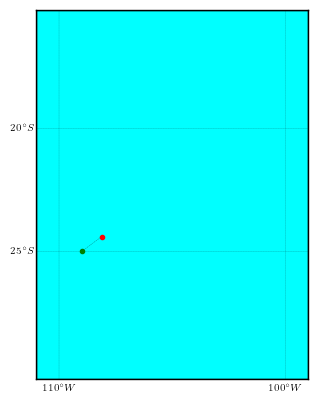

In [7]:
# Draw results and print in pdf file
pts = nt.position2array([P0,P1])
nt.plotRLPath(pts, 5, 10, 'rhumb_line_01.pdf')

<hr>

## Second Rhumb Line Problem

We are given the departure position $P_0=(\varphi_0, \lambda_0)$, rhumb line distance $D_L$, and rhumb line course $\omega_L$ between $P_0$ and $P_1$. The objective is to determine the arrival position $P_1=(\varphi_1, \lambda_1)$.

**Inputs**

- $P_0=(\varphi_0, \lambda_0)$ - departure position
- $D_L$ - rhumb line distance in nautical miles $[\mathrm{Nm}]$
- $\omega_L$ - rhumb line course in degrees $[^\circ]$

**Outputs**

- $P_1=(\varphi_1, \lambda_1)$ - arrival position

In [5]:
# Departure
fi0 = [25,0,'S']
la0 = [109,0,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# RL dist and course
dL = 60.0 # Nm
wL =  53.0 # deg

# Calculation of the 2nd problem
[fi1, la1] = rl.rhumbLineP2(P0, dL, wL)
P1 = [fi1,la1]

# Print results
print('departure:',nt.getPositionString(P0))
print(' distance: {:.1f}Nm'.format(dL))
print('   course: {:.2f}{:s}'.format(wL,nt.arc_deg))
print('----------------')
print('  arrival:',nt.getPositionString(P1))

departure: φ=25°00.00′S; λ=109°00.00′W
 distance: 60.0Nm
   course: 53.00°
----------------
  arrival: φ=24°23.89′S; λ=108°07.26′W
